In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.style.use("seaborn-colorblind")
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [7]:
cement_df = pd.read_excel(r'''C:\Users\SAMARNA\Documents\Learning\ml_case_studies\datasets\Concrete_Data.xls''')

In [8]:
cement_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [9]:
print("Number of rows: ", len(cement_df))
print("Number of columns: ", cement_df.shape[1])

Number of rows:  1030
Number of columns:  9


In [10]:
cement_df.columns = ["cement_component", "furnace_slag", "fly_ash", "water_component", 
                     "superplasticizer", "coarse_aggregate", "fine_aggregate", "age", 
                     "concrete_strength"]

In [11]:
cement_df.head()

,cement_component,furnace_slag,fly_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


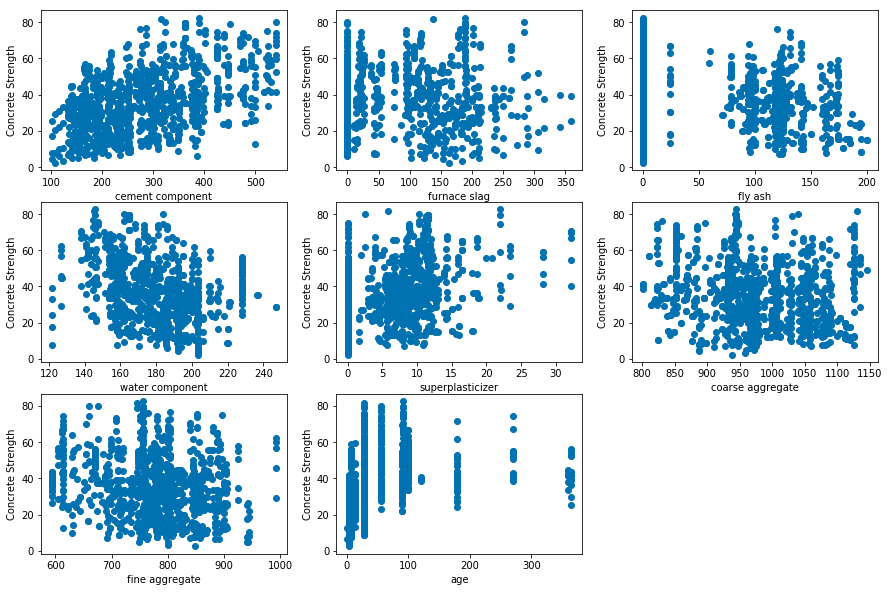

In [12]:
plt.figure(figsize=(15, 10))

plot_count = 1

for feature in list(cement_df.columns)[:-1]:
    plt.subplot(3, 3, plot_count)
    plt.scatter(cement_df[feature], cement_df["concrete_strength"])
    plt.xlabel(feature.replace("_", " "))
    plt.ylabel("Concrete Strength")
    plot_count += 1

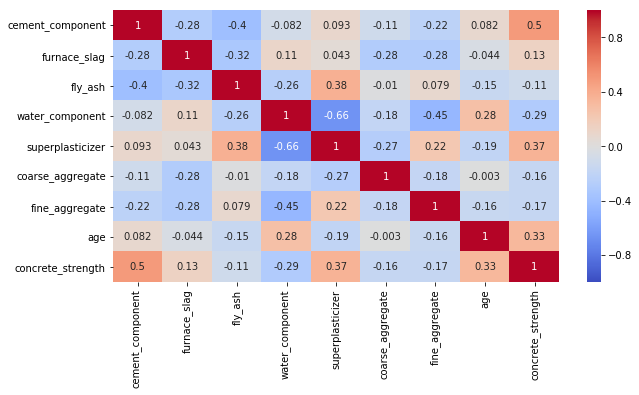

In [13]:
correlation = cement_df.corr(method="pearson")
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, vmin = -1.0, vmax = 1.0, cmap= "coolwarm", annot=True)

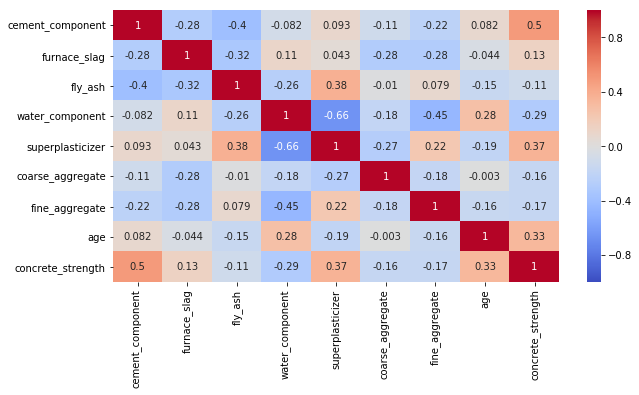

In [14]:
#removing zeroes

cement_df_without_zeroes = cement_df[(cement_df.T != 0).any()]

#calculating Pearson correlations after removeing zeroes

correlation_without_zeroes = cement_df_without_zeroes.corr(method = "pearson")

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_without_zeroes, vmin = -1.0, vmax = 1.0, cmap= "coolwarm", annot=True)

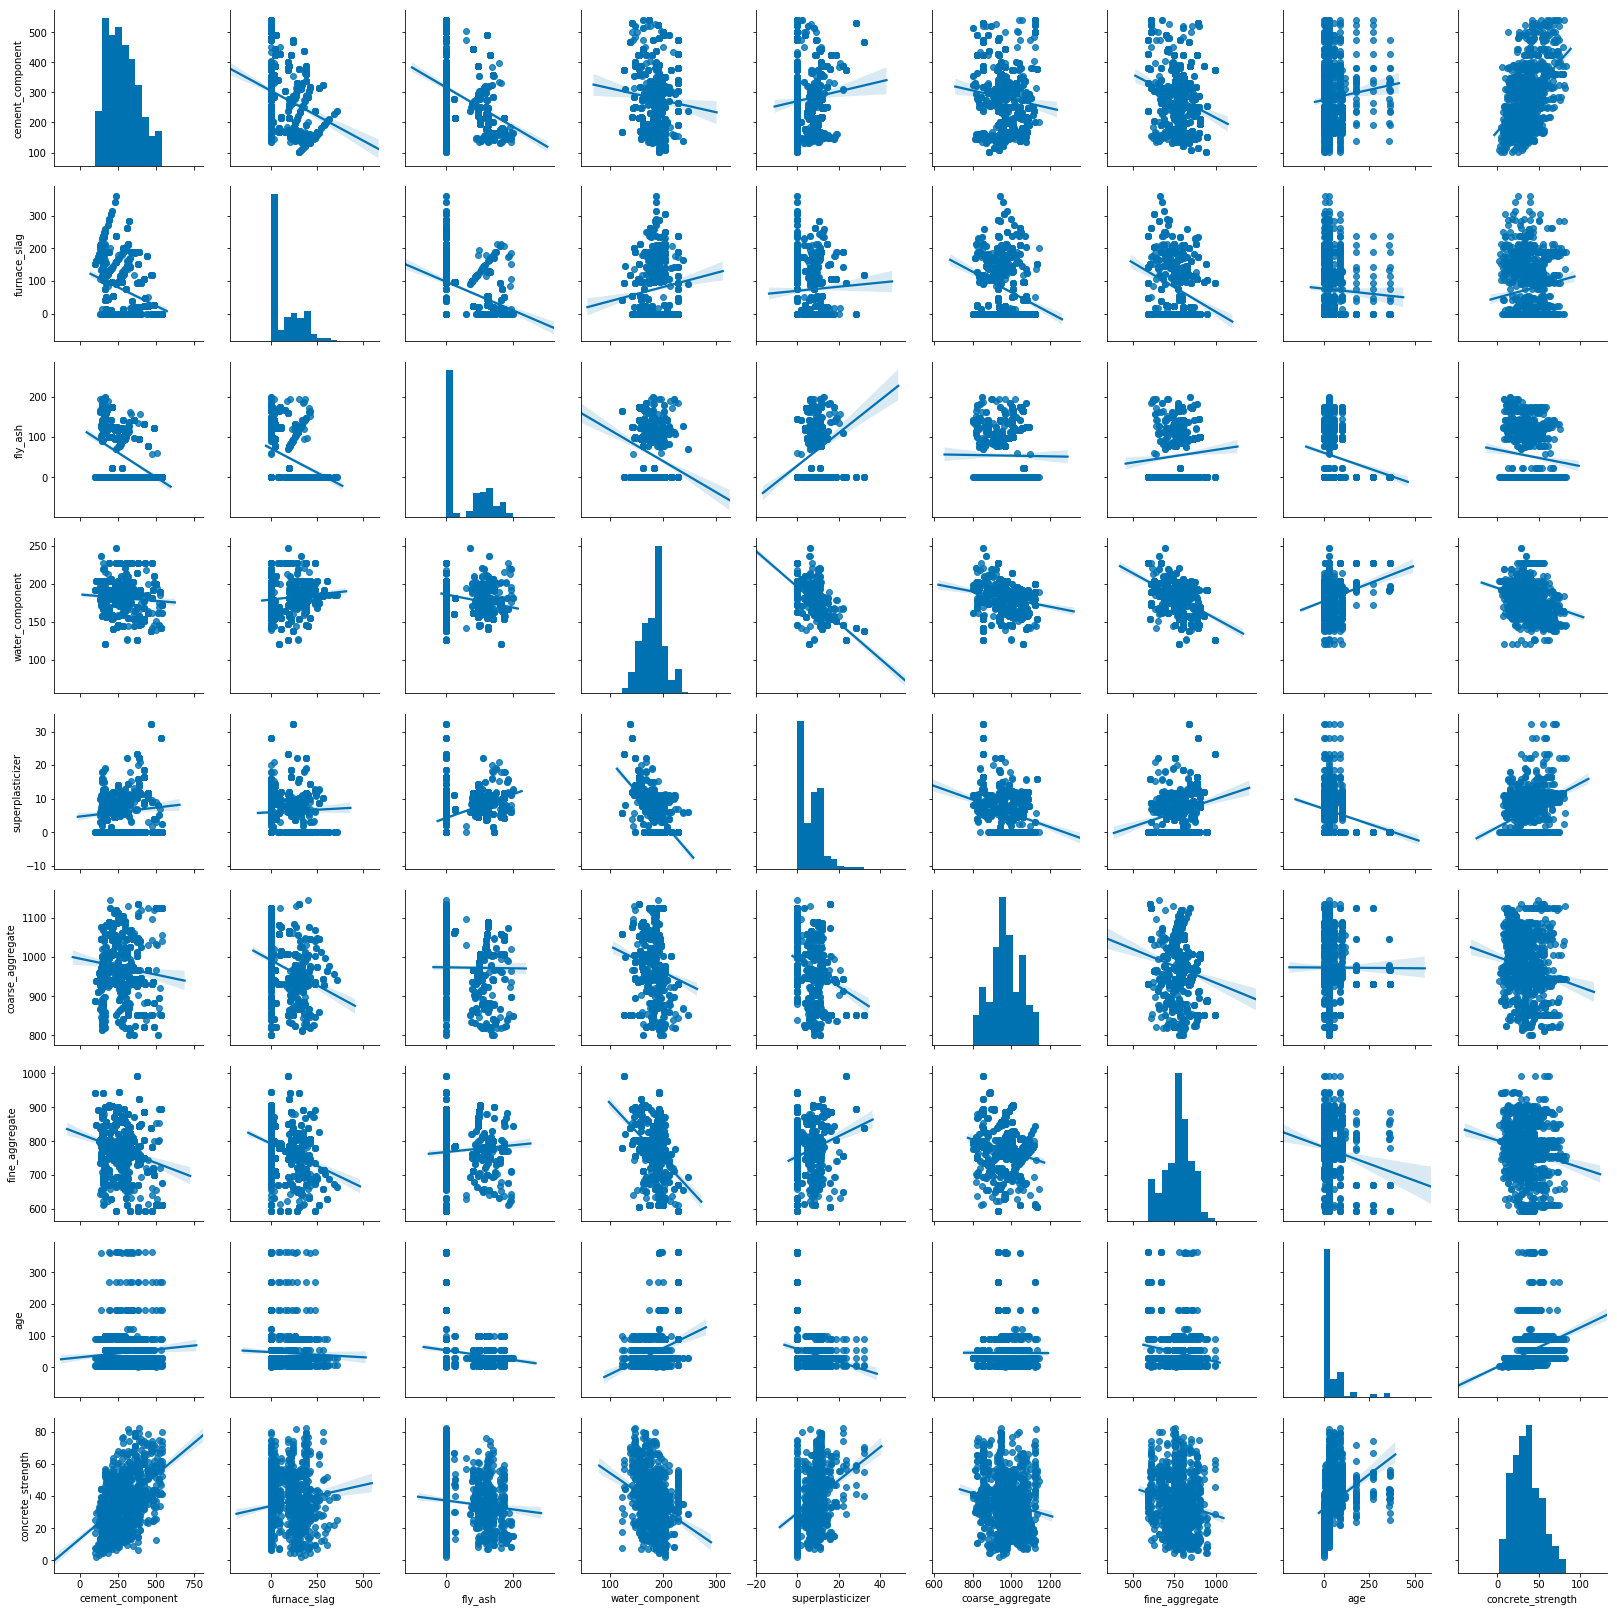

In [15]:
sns.pairplot(cement_df_without_zeroes, vars = cement_df.columns, kind = "reg")

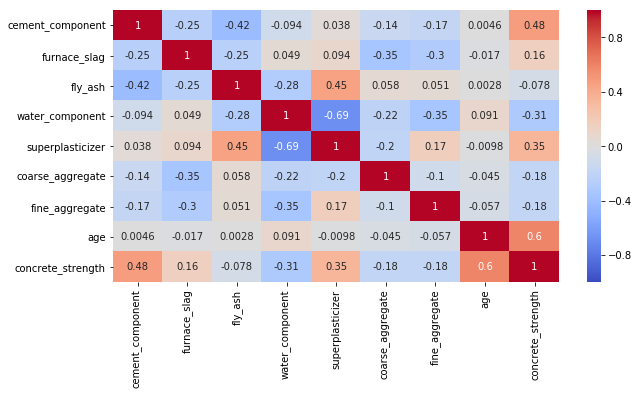

In [16]:
k#plotting Spearman's correlation coefficients

spearman_correlation_without_zeroes = cement_df_without_zeroes.corr(method = "spearman")

plt.figure(figsize=(10, 5))
sns.heatmap(spearman_correlation_without_zeroes, vmin = -1.0, vmax = 1.0, annot = True,  cmap = "coolwarm")

## Simple Linear Regression

cement_component : 0.24114287361789655
fly_ash : 0.07505151881589711
water_component : 0.06273486610199774
superplasticizer : 0.026964819459033285
coarse_aggregate : -0.029859615257482375


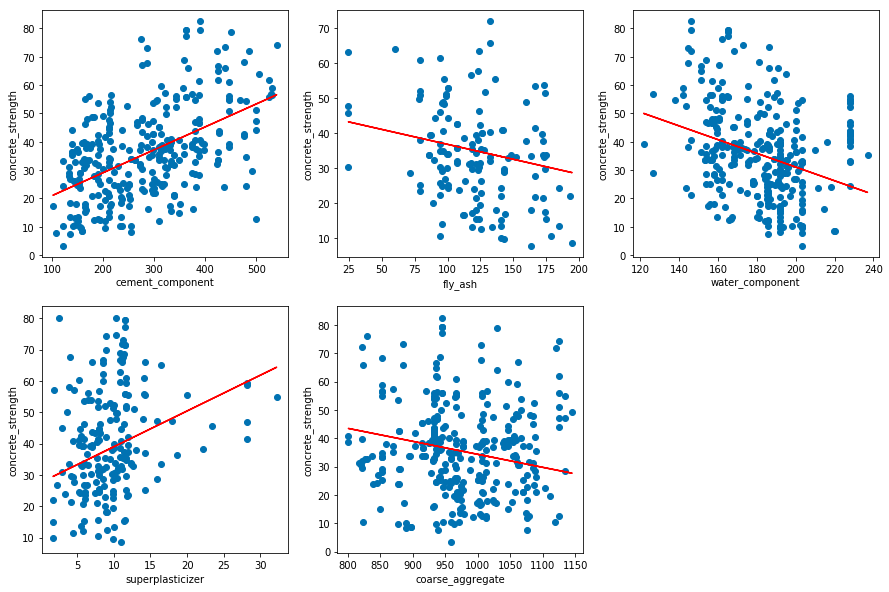

In [17]:
#simple linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

linreg = LinearRegression()

feature_list = ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
response_var = "concrete_strength"

plt.figure(figsize= (15, 10))
plot_count = 1

for feature in feature_list:
    data_tr = cement_df[[response_var, feature]]
    data_tr = data_tr[(data_tr.T != 0).all()]
    
    #split the data
    X_train, x_test, Y_train, y_test = train_test_split(data_tr[feature], 
                                                        data_tr[response_var], 
                                                        test_size = 0.3, 
                                                        random_state = 1)
    
    #reshape data
    X_train = X_train.values.reshape(-1, 1)
    Y_train = Y_train.values.reshape(-1, 1) 
    x_test = x_test.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)
   
    #fit the linear regression model
    linreg.fit(X_train, Y_train)
    
    #predict the output for the test data
    y_pred = linreg.predict(x_test)
    
    plt.subplot(2, 3, plot_count)
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, "r-")
    
    plt.xlabel(feature)
    plt.ylabel("concrete_strength")
    
    plot_count += 1
    
    print(feature, ":", r2_score(y_test, y_pred))
    
plt.show()

## Multiple Linear Regression

Features: ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 Score: 0.23116908904557631
Intercept: 50.50078355811226
Coefficients: [ 0.04795943 -0.02560673 -0.10499693  0.35375471 -0.00542221]


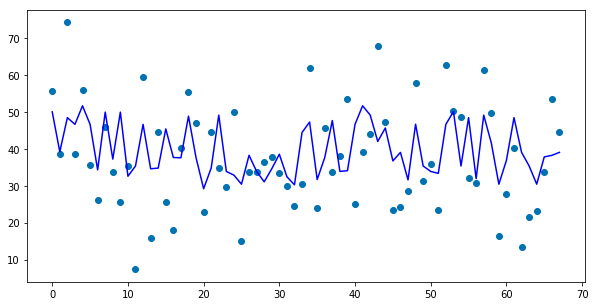

In [18]:
multiple_linreg = LinearRegression()

feature_list = ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
response_var = "concrete_strength"

plt.figure(figsize= (10, 5))
plot_count = 1

data_tr = cement_df
data_tr = data_tr[(data_tr.T != 0).all()]

X_train, x_test, Y_train, y_test = train_test_split(data_tr[feature_list], data_tr[response_var], test_size = 0.3)

multiple_linreg.fit(X_train, Y_train)

y_pred = multiple_linreg.predict(x_test)

plt.scatter(range(len(y_test.values)), y_test)
plt.plot(y_pred, "b-")

print("Features: {0}\nR2 Score: {1}\nIntercept: {2}\nCoefficients: {3}".format(feature_list, 
                                                                               r2_score(y_test, y_pred), 
                                                                               multiple_linreg.intercept_, 
                                                                               multiple_linreg.coef_))

plt.show()

## Support Vector Regressor (kernel = Linear)

c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cement_component : 0.23460745619986612
fly_ash : 0.08714763482339416
water_component : 0.057463622845262186
superplasticizer : 0.011451031951127177


c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coarse_aggregate : -0.06901098454895371


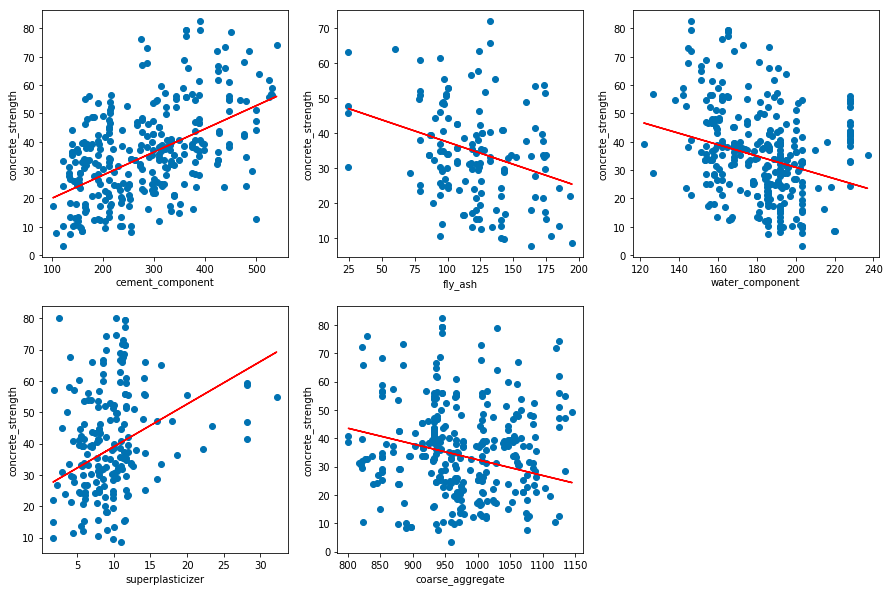

In [19]:
from sklearn.svm import SVR

svreg = SVR(kernel= "linear")

feature_list = ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
response_var = "concrete_strength"

plt.figure(figsize= (15, 10))
plot_count = 1

for feature in feature_list:
    data_tr = cement_df[[response_var, feature]]
    data_tr = data_tr[(data_tr.T != 0).all()]
    
    #split the data
    X_train, x_test, Y_train, y_test = train_test_split(data_tr[feature], data_tr[response_var], test_size = 0.3, random_state = 1)
   
    #reshape data
    X_train = X_train.values.reshape(-1, 1)
    Y_train = Y_train.values.reshape(-1, 1) 
    x_test = x_test.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)
    
    #fit the linear regression model
    svreg.fit(X_train, Y_train)
    
    #predict the output for the test data
    y_pred = svreg.predict(x_test)
    
    plt.subplot(2, 3, plot_count)
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, "r-")
    
    plt.xlabel(feature)
    plt.ylabel("concrete_strength")
    
    plot_count += 1
    print("{0} : {1}".format(feature, r2_score(y_test, y_pred)))
    
plt.show()

## Support Vector Regressor (kernel = RBF)

c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


cement_component : 0.12838288115913787
fly_ash : 0.024401656395611093
water_component : 0.1560726638680563
superplasticizer : 0.02439653556095933
coarse_aggregate : 0.08911215547271822


c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly 

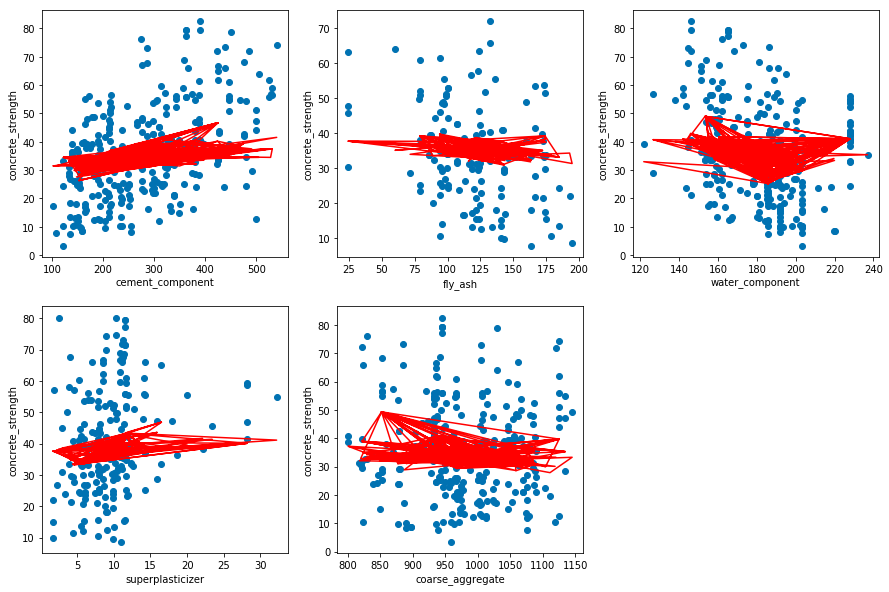

In [20]:
from sklearn.svm import SVR

svreg = SVR(kernel= "rbf")

feature_list = ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
response_var = "concrete_strength"

plt.figure(figsize= (15, 10))
plot_count = 1

for feature in feature_list:
    data_tr = cement_df[[response_var, feature]]
    data_tr = data_tr[(data_tr.T != 0).all()]
    
    #split the data
    X_train, x_test, Y_train, y_test = train_test_split(data_tr[feature], data_tr[response_var], test_size = 0.3, random_state = 1)
   
    #reshape data
    X_train = X_train.values.reshape(-1, 1)
    Y_train = Y_train.values.reshape(-1, 1) 
    x_test = x_test.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)
    
    #fit the linear regression model
    svreg.fit(X_train, Y_train)
    
    #predict the output for the test data
    y_pred = svreg.predict(x_test)
    
    plt.subplot(2, 3, plot_count)
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, "r-")
    
    plt.xlabel(feature)
    plt.ylabel("concrete_strength")
    
    plot_count += 1
    print("{0} : {1}".format(feature, r2_score(y_test, y_pred)))
    
plt.show()

## Support Vector Regressor (Sigmoid)

c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly 

cement_component : -0.025666097504320806
fly_ash : -0.007706601601587426
water_component : -0.025666097504320806
superplasticizer : -0.04305619323419552
coarse_aggregate : -0.025666097504320806


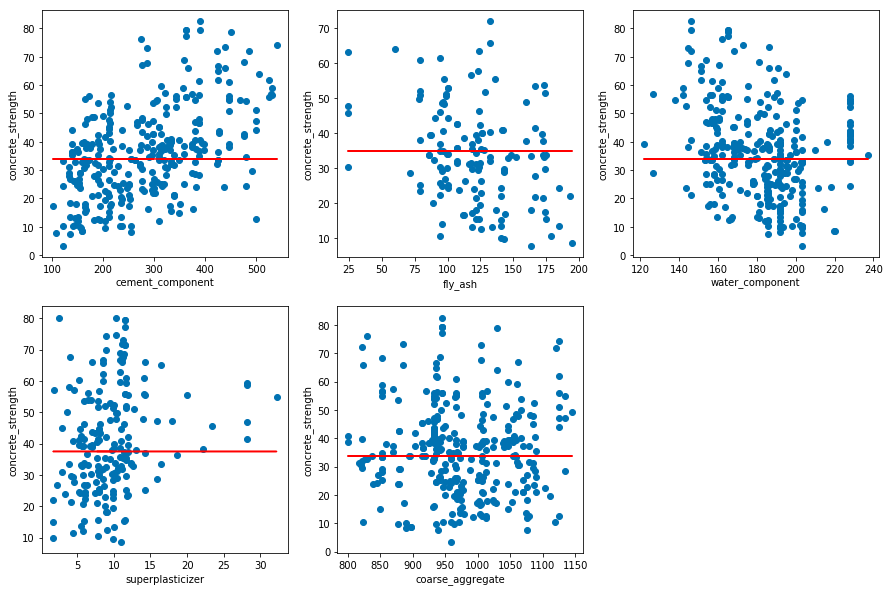

In [21]:
from sklearn.svm import SVR

svreg = SVR(kernel= "sigmoid")

feature_list = ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
response_var = "concrete_strength"

plt.figure(figsize= (15, 10))
plot_count = 1

for feature in feature_list:
    data_tr = cement_df[[response_var, feature]]
    data_tr = data_tr[(data_tr.T != 0).all()]
    
    #split the data
    X_train, x_test, Y_train, y_test = train_test_split(data_tr[feature], data_tr[response_var], test_size = 0.3, random_state = 1)
   
    #reshape data
    X_train = X_train.values.reshape(-1, 1)
    Y_train = Y_train.values.reshape(-1, 1) 
    x_test = x_test.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)
    
    #fit the linear regression model
    svreg.fit(X_train, Y_train)
    
    #predict the output for the test data
    y_pred = svreg.predict(x_test)
    
    plt.subplot(2, 3, plot_count)
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, "r-")
    
    plt.xlabel(feature)
    plt.ylabel("concrete_strength")
    
    plot_count += 1
    print("{0} : {1}".format(feature, r2_score(y_test, y_pred)))
    
plt.show()

Features: ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 Score: -0.00818412435959126
Intercept: 50.50078355811226
Coefficients: [ 0.04795943 -0.02560673 -0.10499693  0.35375471 -0.00542221]


c:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


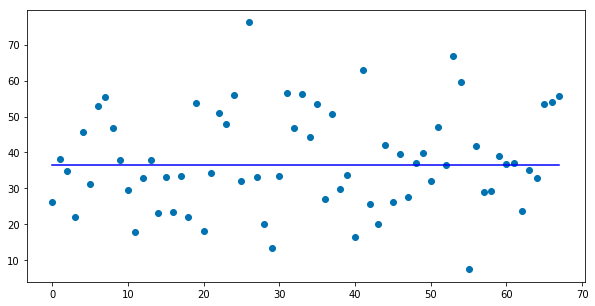

In [22]:
svreg = SVR(kernel= "sigmoid")

feature_list = ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
response_var = "concrete_strength"

plt.figure(figsize= (10, 5))
plot_count = 1

data_tr = cement_df
data_tr = data_tr[(data_tr.T != 0).all()]

X_train, x_test, Y_train, y_test = train_test_split(data_tr[feature_list], 
                                                    data_tr[response_var], 
                                                    test_size = 0.3)

svreg.fit(X_train, Y_train)

y_pred = svreg.predict(x_test)

plt.scatter(range(len(y_test.values)), y_test)
plt.plot(y_pred, "b-")

print("Features: {0}\nR2 Score: {1}\nIntercept: {2}\nCoefficients: {3}".format(feature_list, 
                                                                               r2_score(y_test, y_pred), 
                                                                               multiple_linreg.intercept_, 
                                                                               multiple_linreg.coef_))

plt.show()

Features: ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 Score: -0.1330092219155854
Intercept: 50.50078355811226
Coefficients: [ 0.04795943 -0.02560673 -0.10499693  0.35375471 -0.00542221]


c:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


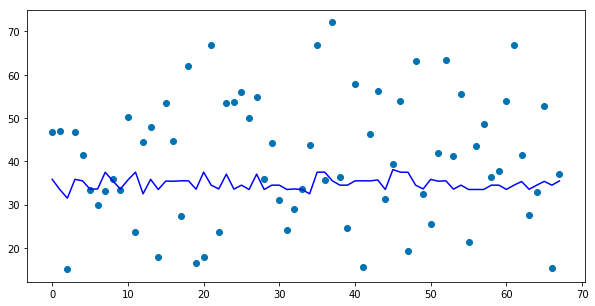

In [23]:
svreg = SVR(kernel= "rbf")

feature_list = ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
response_var = "concrete_strength"

plt.figure(figsize= (10, 5))
plot_count = 1
data_tr = cement_df
data_tr = data_tr[(data_tr.T != 0).all()]
X_train, x_test, Y_train, y_test = train_test_split(data_tr[feature_list], 
                                                    data_tr[response_var], 
                                                    test_size = 0.3)
svreg.fit(X_train, Y_train)
y_pred = svreg.predict(x_test)
plt.scatter(range(len(y_test.values)), y_test)
plt.plot(y_pred, "b-")

print("Features: {0}\nR2 Score: {1}\nIntercept: {2}\nCoefficients: {3}".format(feature_list, 
                                                                               r2_score(y_test, y_pred), 
                                                                               multiple_linreg.intercept_, 
                                                                               multiple_linreg.coef_))
plt.show()